In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact
import numpy as np
import ast

In [ ]:
def top_hashtag(df):
    df['hashtags'] = df['hashtags'].str.split()

    df_expanded = df.explode('hashtags').reset_index(drop=True)
    def plot_top_hashtags(year):
        df_year = df_expanded[df_expanded['year'] == year]
        
        hashtag_counts = df_year['hashtags'].value_counts().reset_index()
        hashtag_counts.columns = ['hashtag', 'count']
        
        top_hashtags = hashtag_counts.head(5)
        
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=top_hashtags, x='hashtag', y='count', palette='viridis')
        
        plt.title(f'Top 5 Hashtags más usados en el año {year}')
        plt.xticks(rotation=45)
        plt.ylabel("Cantidad de veces usadas")
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.0f}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='center', fontsize=12, color='black', 
                        xytext=(0, 8), textcoords='offset points')
        
        plt.show()
    min_year = df_expanded['year'].min()
    max_year = df_expanded['year'].max()
    year_slider = widgets.IntSlider(
        value=min_year,
        min=min_year,
        max=max_year,
        step=1,
        description='Año:',
        continuous_update=False
    )

    interact(plot_top_hashtags, year=year_slider)


def hash_view_top(df):

    df['hashtags'] = df['hashtags'].str.split()        
    df_expanded = df.explode('hashtags').reset_index(drop=True)

    def plot_top_hashtags_views(year):
        

        df_year = df_expanded[df_expanded['year'] == year]
        
        top_hashtag_views = df_year.groupby(['month', 'hashtags'])['playCount'].sum().reset_index()
        
        top_hashtag_views = top_hashtag_views.loc[top_hashtag_views.groupby('month')['playCount'].idxmax()]
        
        dic = {
            1: "Enero",
            2: "Febrero",
            3: "Marzo",
            4: "Abril",
            5: "Mayo",
            6: "Junio",
            7: "Julio",
            8: "Agosto",
            9: "Setiembre",
            10: "Octubre",
            11: "Noviembre",
            12: "Diciembre"
        }
        
        top_hashtag_views['month'] = top_hashtag_views['month'].map(dic)
        
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=top_hashtag_views, x='month', y='playCount', hue='hashtags', dodge=False)
        
        plt.title(f'Hashtag con más vistas por mes en el año {year}')
        
        plt.xticks(rotation=45)
        
        plt.legend(title='Hashtag', loc='upper right')
        
        for p in ax.patches:
            height = p.get_height()
            
            if not np.isnan(height):
                ax.annotate(f'{int(height)}', 
                            (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', 
                            fontsize=12, color='black', 
                            xytext=(0, 8), textcoords='offset points')
        
        plt.show()
    min_year = df_expanded['year'].min()
    max_year = df_expanded['year'].max()
    year_slider = widgets.IntSlider(
        value=min_year,
        min=min_year,
        max=max_year,
        step=1,
        description='Año:',
        continuous_update=False  
    )
    interact(plot_top_hashtags_views, year=year_slider)

def interacion(df):
    df_grouped = df.groupby(['year', 'month']).agg({'diggCount': 'sum', 'shareCount': 'sum', 'playCount': 'sum'}).reset_index()

    def plot_interaction(interaction_type):
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=df_grouped, x='month', y=interaction_type, hue='year', marker='o')
        plt.title(f'{interaction_type} por Mes y Año')
        plt.xlabel('Mes')
        plt.ylabel('Cantidad de Interacciones')
        plt.xticks(rotation= 90,ticks=range(1, 13), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
        
        plt.legend(title='Año')
        plt.show()

    interact(plot_interaction, interaction_type=['diggCount', 'shareCount', 'playCount'])

def interacion_year(df):
    df_grouped = df.groupby(['year', 'month']).agg({'diggCount': 'sum', 'shareCount': 'sum', 'playCount': 'sum'}).reset_index()

    def plot_interaction(year):
        df_year = df_grouped[df_grouped['year'] == year]
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=df_year, x='month', y='diggCount', marker='o', label='Diggs')
        sns.lineplot(data=df_year, x='month', y='shareCount', marker='o', label='Shares')
        sns.lineplot(data=df_year, x='month', y='playCount', marker='o', label='Plays')
        
        plt.title(f'Interacciones en el Año {year}')
        plt.xlabel('Mes')
        plt.ylabel('Cantidad de Interacciones')
        plt.xticks(rotation=90, ticks=range(1, 13), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
        plt.legend(title='Interacción')
        plt.show()
    min_year = df['year'].min()
    max_year = df['year'].max()

    year_slider = widgets.IntSlider(
        value=min_year,
        min=min_year,
        max=max_year,
        step=1,
        description='Año:',
        continuous_update=False  
    )

    interact(plot_interaction, year=year_slider)

def engagement_fans(df):
    def engag_fans_year(year):
        df_year = df[df['year'] == year]

        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df_year, x='fans', y='eng_ratio', alpha=0.6, color='blue')

        plt.title('Relación entre Engagement y Fans')
        plt.xlabel('Número de Fans')
        plt.ylabel('Engagement Ratio')
        plt.show()
    min_year = df['year'].min()
    max_year = df['year'].max()

    year_slider = widgets.IntSlider(
        value=min_year,
        min=min_year,
        max=max_year,
        step=1,
        description='Año:',
        continuous_update=False  
    )

    interact(engag_fans_year, year=year_slider)

# def sentiment_per(df):
#     df_temp= df.copy()
#     def parse_sentiment(sentiment_str):
#         if sentiment_str == 'No text provided': 
#             return None
        
#         try:
#             sentiment_str = sentiment_str.replace('[', '{').replace(']', '}')
            
#             sentiment_dict = ast.literal_eval(sentiment_str)
            
#             if isinstance(sentiment_dict, dict):
#                 return sentiment_dict
#         except Exception as e:
#             print(f"Error en la conversión de la cadena: {e}") 
#             return None 

#     df_temp['sentiment_percentages'] = df_temp['sentiment_percentages'].apply(parse_sentiment)


#     sentiments = ['happiness', 'sadness', 'anger', 'fear', 'surprise']

#     for sentiment in sentiments:
#         df_temp[sentiment] = df_temp['sentiment_percentages'].apply(lambda x: x.get(sentiment, np.nan) if isinstance(x, dict) else np.nan)


#     df_temp[sentiments] = df_temp[sentiments].replace('No text provided', np.nan)

#     df_grouped = df_temp.groupby(['year', 'month'])[sentiments].mean().reset_index()

#     df_grouped['year'] = df_grouped['year'].astype(int)
#     df_grouped['month'] = df_grouped['month'].astype(int)


#     def plot_sentiment_heatmap(sentiment):
#         pivot_table = df_grouped.pivot_table(index='month', columns='year', values=sentiment)

#         pivot_table = pivot_table.dropna(how='all', axis=0)  # Elimina filas con solo NaN
#         pivot_table = pivot_table.dropna(how='all', axis=1)  # Elimina columnas con solo NaN

#         if not pivot_table.empty:
#             plt.figure(figsize=(12, 6))
#             sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')

#             plt.title(f'Sentimiento Promedio de {sentiment.capitalize()} por Año y Mes')
#             plt.xlabel('Año')
#             plt.ylabel('Mes')
#             plt.yticks(ticks=range(1, 13), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=0)
#             plt.show()
#         else:
#             print(f"No hay datos suficientes para {sentiment.capitalize()}.")

#     interact(plot_sentiment_heatmap, sentiment=sentiments);

def duracion_reaccion(df_video):
    df_video['engagement'] = df_video['shareCount'] + df_video['collectCount'] + df_video['commentCount'] + df_video['playCount']

    plt.figure(figsize=(10, 6))
    plt.scatter(df_video['duration'], df_video['engagement'], alpha=0.5)
    plt.title('Relación entre Duración y Número de Reacciones (Engagement)')
    plt.xlabel('Duración (segundos)')
    plt.ylabel('Número de Reacciones (Engagement)')
    plt.grid(True)
    plt.show()

def vistas_coments(df):
    def vi_co(year):
        df_temp=df[df['year'] == year]
        plt.figure(figsize=(10, 6))
        plt.scatter(df_temp['commentCount'], df_temp['playCount'], alpha=0.5)
        plt.title('Relación entre la Cuenta de Comentarios y la Reacción de Vistas')
        plt.xlabel('Cuenta de Comentarios')
        plt.ylabel('Cantidad de Vistas')
        plt.grid(True)

        plt.show()
    min_year = df['year'].min()
    max_year = df['year'].max()

    year_slider = widgets.IntSlider(
        value=min_year,
        min=min_year,
        max=max_year,
        step=1,
        description='Año:',
        continuous_update=False  
    )

    interact(vi_co, year=year_slider)


def reac_commen(df):
    
    def año_reactio_commen(year):
        df_temp=df[df['year'] == year].copy()
        df_temp['total_reactions'] = df_temp['playCount'] + df_temp['shareCount'] + df_temp['diggCount']
        plt.figure(figsize=(10, 6))
        plt.scatter(df_temp['commentCount'], df_temp['total_reactions'], alpha=0.5)
        plt.title('Cantidad de Comentarios vs. Reacciones (Plays, Shares, Diggs)')
        plt.xlabel('Cantidad de Comentarios')
        plt.ylabel('Reacciones Totales')
        plt.grid(True)

        plt.show()
    min_year = df['year'].min()
    max_year = df['year'].max()

    year_slider = widgets.IntSlider(
        value=min_year,
        min=min_year,
        max=max_year,
        step=1,
        description='Año:',
        continuous_update=False  
    )

    interact(año_reactio_commen, year=year_slider)

def Seguido_comen(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['fans'], df['commentCount'], alpha=0.5)
    plt.title('Relación entre Seguidores y Comentarios')
    plt.xlabel('Número de Seguidores (Fans)')
    plt.ylabel('Cuenta de Comentarios')
    plt.show()

def canción_más_vistas_por_mes(df):
    
    def canción_más_vistas_por_mes_y_año(year):
        df_temp = df[df['year'] == year]
        
        monthly_data = df_temp.groupby(['year', 'month', 'musicName'])['playCount'].sum().reset_index()

        max_views_per_month = monthly_data.loc[monthly_data.groupby(['month'])['playCount'].idxmax()]
        month_names = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                       'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

        plt.figure(figsize=(12, 8))
        for month in range(1, 13):
            song_data = max_views_per_month[max_views_per_month['month'] == month]
            
            if not song_data.empty:
                plt.bar(month, song_data['playCount'].values[0], label=song_data['musicName'].values[0])

        plt.title(f'Canción con Más Vistas por Mes - Año {year}')
        plt.xlabel('Mes')
        plt.ylabel('Número de Reproducciones')
        plt.xticks(range(1, 13), month_names, rotation=90)  
        plt.legend(title='Canción', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()

    min_year = df['year'].min()
    max_year = df['year'].max()

    year_slider = widgets.IntSlider(
        value=min_year,
        min=min_year,
        max=max_year,
        step=1,
        description='Año:',
        continuous_update=False  
    )

    interact(canción_más_vistas_por_mes_y_año, year=year_slider)

## BASE DE DATOS DE AUTORES

def seguidores_fans(df):
    plt.figure(figsize=(10, 6))
    plt.hist(df['fans'], bins=10, color='skyblue', edgecolor='black')
    plt.title('Distribución de Seguidores (Fans)', fontsize=16)
    plt.xlabel('Número de Seguidores (Fans)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.grid(True)
    plt.show()


def interacion_video(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['video'], df['heart'], label='Hearts', color='blue', alpha=0.5)
    plt.scatter(df['video'], df['digg'], label='Diggs', color='green', alpha=0.5)
    plt.title('Interacciones por Video (Hearts y Diggs)', fontsize=16)
    plt.xlabel('Número de Videos', fontsize=12)
    plt.ylabel('Número de Interacciones', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

def verificados_no(df):
    labels = ['Verificados', 'No Verificados']
    sizes = df['verified'].value_counts()
    sizes.plot(kind='bar', color=['lightblue', 'lightcoral'], figsize=(8, 6))
    plt.title('Cantidad de Cuentas Verificadas vs No Verificadas', fontsize=16)
    plt.xlabel('Estado de Verificación', fontsize=12)
    plt.ylabel('Cantidad de Cuentas', fontsize=12)
    plt.xticks(ticks=[0, 1], labels=labels)
    plt.grid(True)
    plt.show()

def fans_videos(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['fans'], df['video'], color='orange', alpha=0.6)
    plt.title('Relación entre Seguidores (Fans) y Número de Videos', fontsize=16)
    plt.xlabel('Número de Seguidores (Fans)', fontsize=12)
    plt.ylabel('Número de Videos', fontsize=12)
    plt.grid(True)
    plt.show()

## VIDEO MUSIC 


def distribu_video(df):
    df['duration'].plot(kind='hist', bins=20, color='lightblue', edgecolor='black', figsize=(10, 6))
    plt.title('Distribución de Duración de los Videos', fontsize=16)
    plt.xlabel('Duración (segundos)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.grid(True)
    plt.show()

def ancho_alto(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['width'], df['height'], color='purple', alpha=0.6)
    plt.title('Relación entre Ancho y Alto de los Videos', fontsize=16)
    plt.xlabel('Ancho (px)', fontsize=12)
    plt.ylabel('Alto (px)', fontsize=12)
    plt.grid(True)
    plt.show()

def song_usadas(df):
    music_counts = df['musicName'].value_counts()
    music_counts.head(10).plot(kind='bar', color='skyblue', figsize=(10, 6))
    plt.title('Top 10 Canciones más Usadas en los Videos', fontsize=16)
    plt.xlabel('Nombre de la Canción', fontsize=12)
    plt.ylabel('Número de Usos', fontsize=12)
    plt.grid(True)
    plt.show()    

def album_usadas(df):
    album_counts = df['musicAlbum'].value_counts()
    album_counts.head(10).plot(kind='bar', color='orange', figsize=(10, 6))
    plt.title('Top 10 Álbumes de Música Más Usados en Videos', fontsize=16)
    plt.xlabel('Álbum', fontsize=12)
    plt.ylabel('Número de Videos', fontsize=12)
    plt.grid(True)
    plt.show()

def dura_song_video(df):
    avg_duration_per_music = df.groupby('musicAuthor')['duration'].mean()
    avg_duration_per_music.sort_values(ascending=False).head(10).plot(kind='bar', color='lightseagreen', figsize=(10, 6))
    plt.title('Duración Promedio de Videos por Autor de Música', fontsize=16)
    plt.xlabel('Autor de Música', fontsize=12)
    plt.ylabel('Duración Promedio (segundos)', fontsize=12)
    plt.grid(True)
    plt.show()

Gráfica de Hashtags más usados por año


interactive(children=(IntSlider(value=2020, continuous_update=False, description='Año:', max=2024, min=2020), …

Hashtags con más vista por cada mes


interactive(children=(IntSlider(value=2020, continuous_update=False, description='Año:', max=2024, min=2020), …

Interacciones por mes y Año


interactive(children=(Dropdown(description='interaction_type', options=('diggCount', 'shareCount', 'playCount'…

Interacciones por Año


interactive(children=(IntSlider(value=2020, continuous_update=False, description='Año:', max=2024, min=2020), …

Relación de engagmente y fans por año


interactive(children=(IntSlider(value=2020, continuous_update=False, description='Año:', max=2024, min=2020), …

relacion de duración de video por número de interacciones


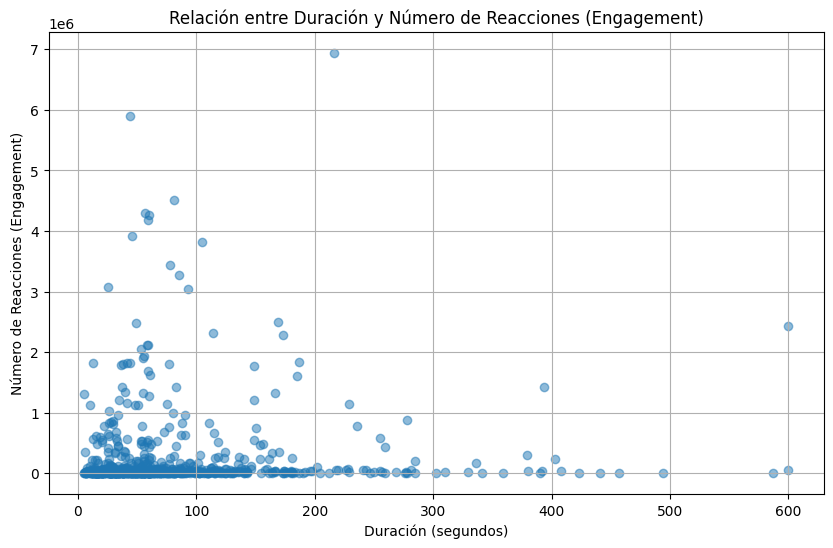

relación de vistas vs comentarios


interactive(children=(IntSlider(value=2020, continuous_update=False, description='Año:', max=2024, min=2020), …

Relación de reacciones por comentarios


interactive(children=(IntSlider(value=2020, continuous_update=False, description='Año:', max=2024, min=2020), …

Relación de seguidores y comentarios


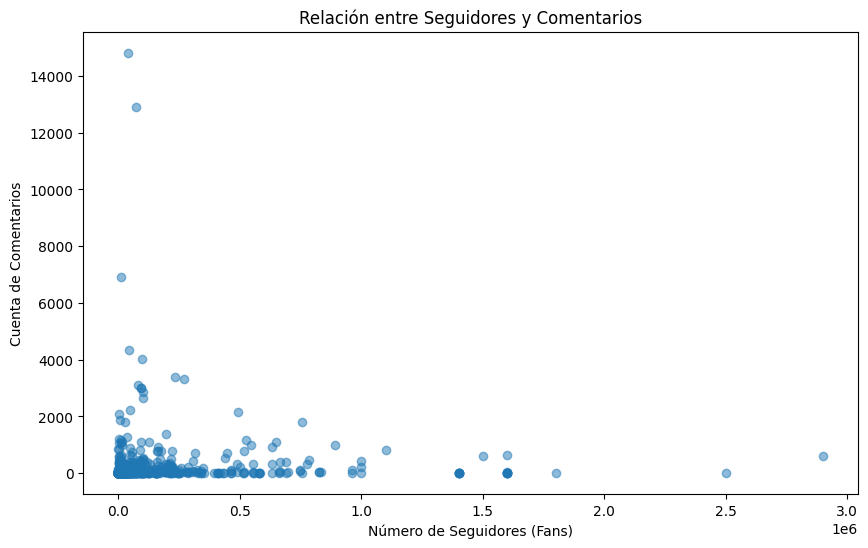

Canciones más visats por mes


interactive(children=(IntSlider(value=2020, continuous_update=False, description='Año:', max=2024, min=2020), …

Distribucion de seguidores


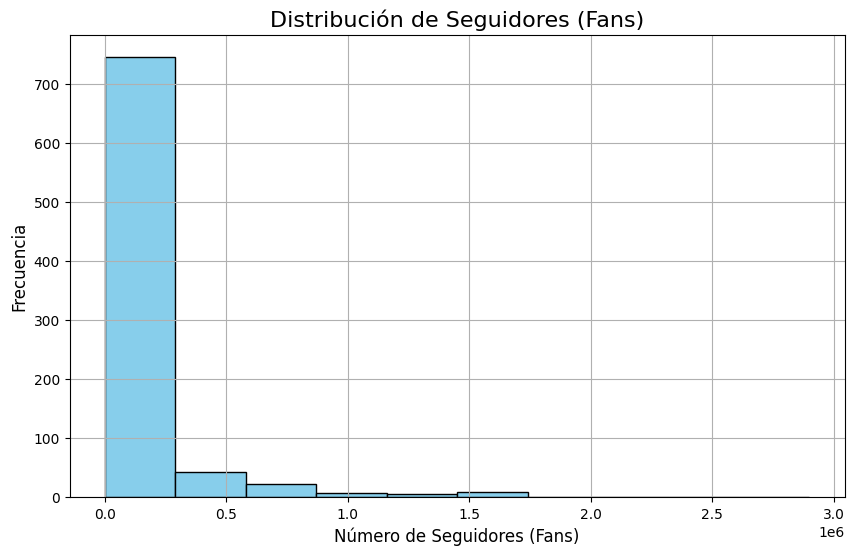

interaccion por video


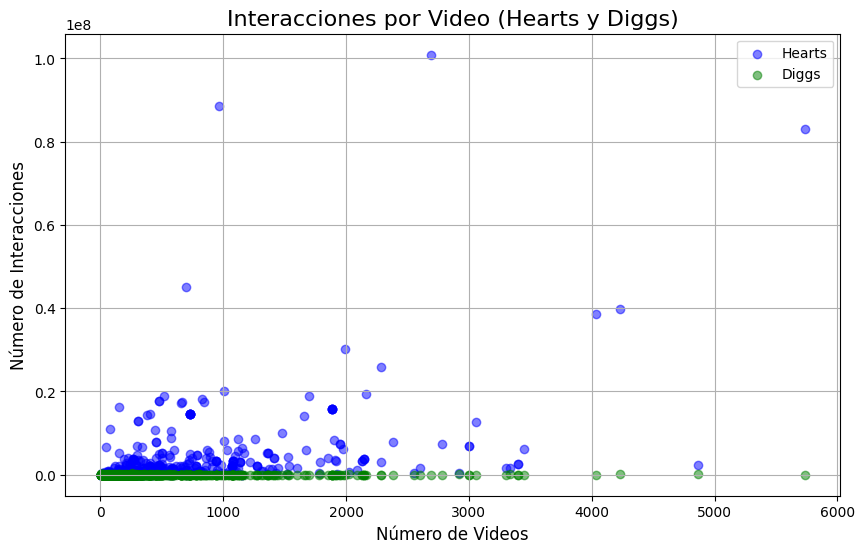

distribucion de verificados o no


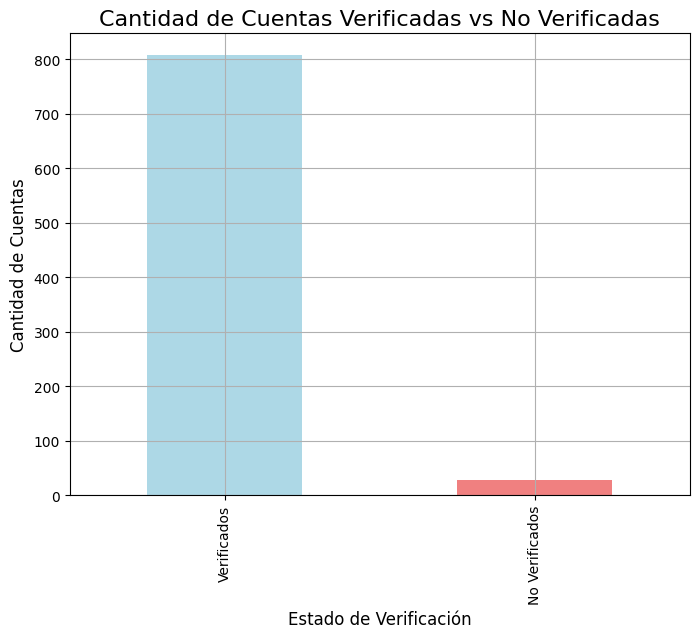

numero de videos por cantidad de fans


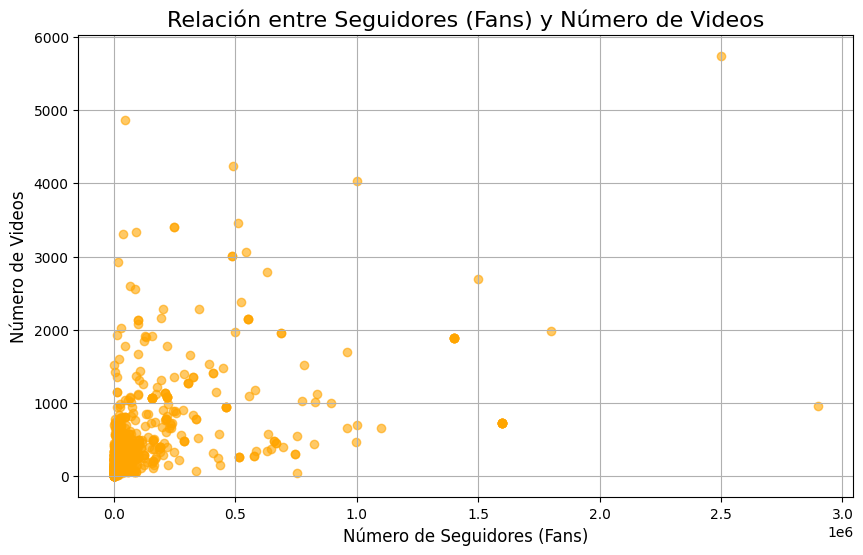

distribucion de duracion de videos


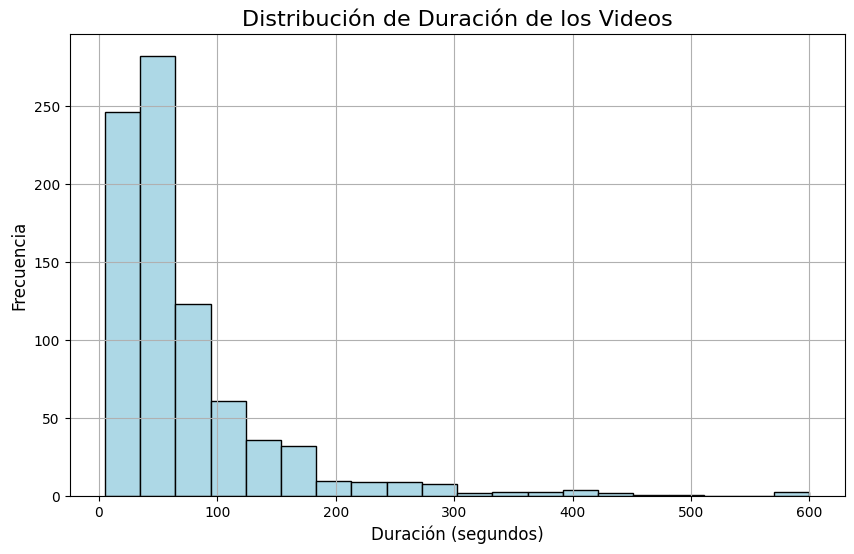

ancho x altura


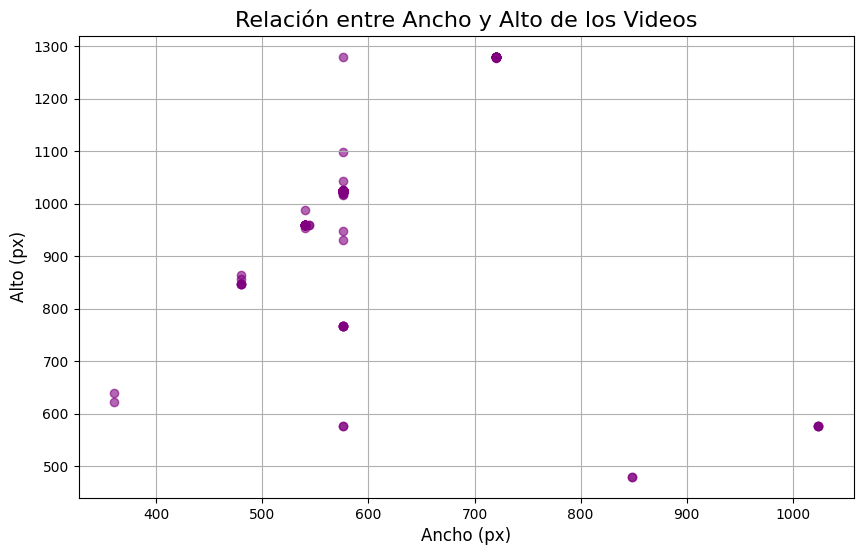

Top 10 canciones mas usadas


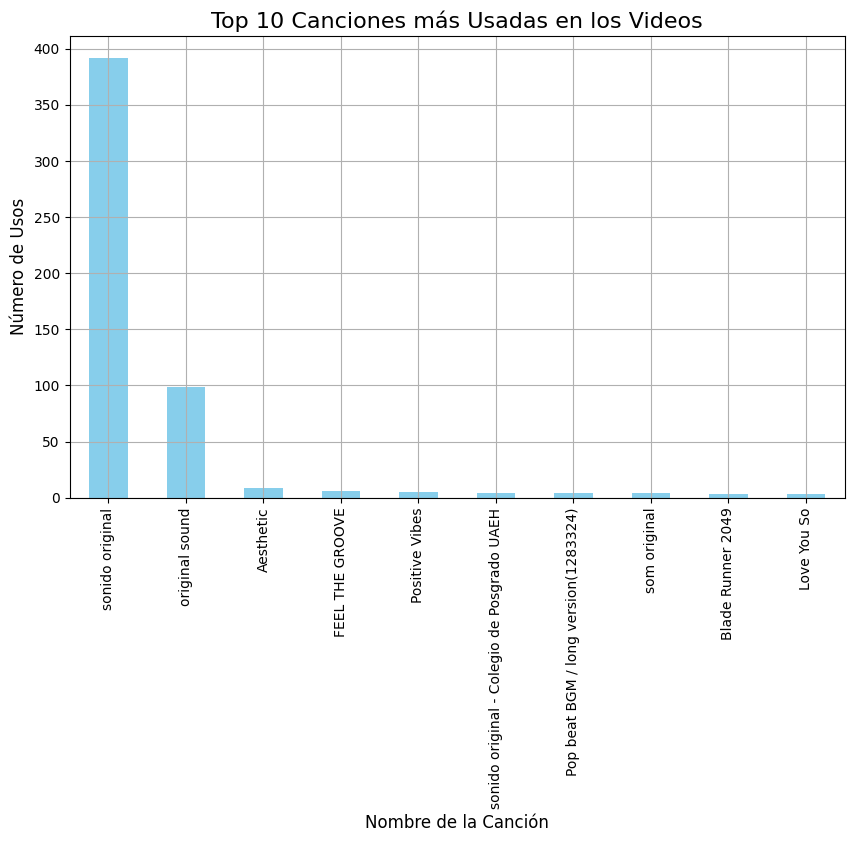

top 10 albums mas usados


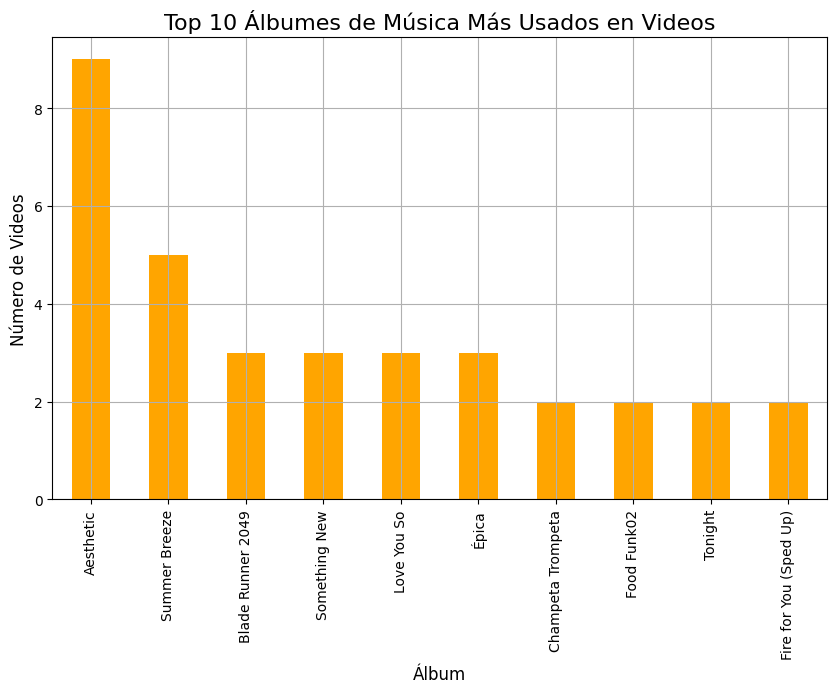

duracion de video por cancion


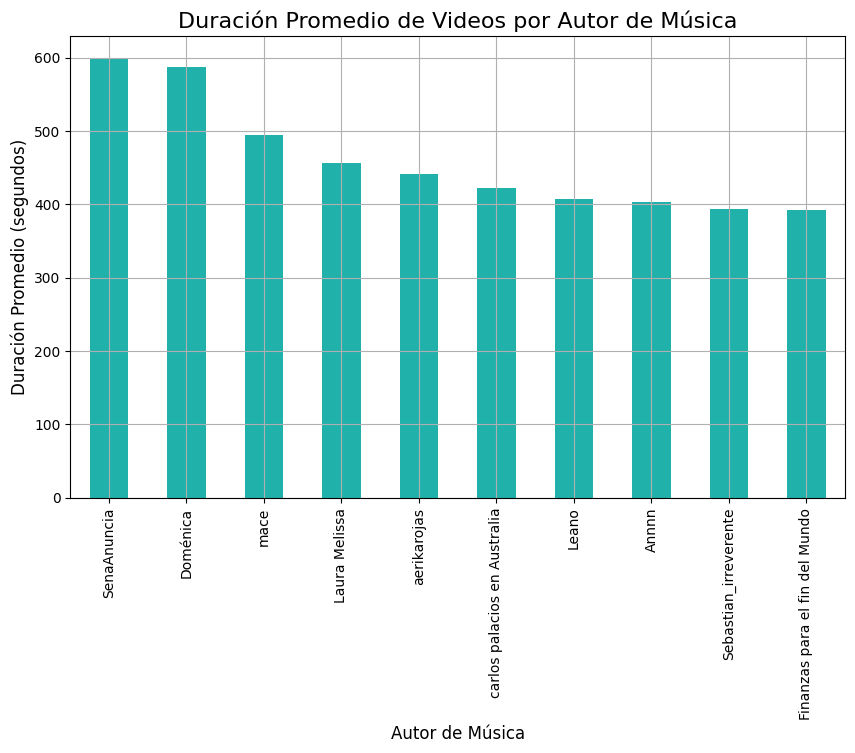

In [3]:
def main():
    df= pd.read_csv("df_processed.csv")
    print("Gráfica de Hashtags más usados por año")
    top_hashtag(df.copy())
    
    print("Hashtags con más vista por cada mes")
    hash_view_top(df.copy())
    print("Interacciones por mes y Año")

    interacion(df.copy())

    print("Interacciones por Año")
    interacion_year(df.copy())

    print("Relación de engagmente y fans por año")
    engagement_fans(df.copy())

    # print("Promedio de sentimeinto por año y mes")
    # sentiment_per(df.copy())
    
    

    print("relacion de duración de video por número de interacciones")
    duracion_reaccion(df.copy())

    print("relación de vistas vs comentarios")
    vistas_coments(df.copy())

    print("Relación de reacciones por comentarios")

    reac_commen(df.copy())

    print("Relación de seguidores y comentarios")
    Seguido_comen(df.copy())

    

    print("Canciones más visats por mes")
    canción_más_vistas_por_mes(df.copy())
    df_video=pd.read_csv('post_video_music.csv')
    au=pd.read_csv("author.csv")
    print("Distribucion de seguidores")
    seguidores_fans(au.copy())

    print("interaccion por video")
    interacion_video(au.copy())
    print("distribucion de verificados o no")
    verificados_no(au.copy())
    print("numero de videos por cantidad de fans")
    fans_videos(au.copy())

    print("distribucion de duracion de videos")
    distribu_video(df_video)
    print("ancho x altura")
    ancho_alto(df_video.copy())
    print("Top 10 canciones mas usadas")
    song_usadas(df_video.copy())
    print("top 10 albums mas usados")
    album_usadas(df_video.copy())
    print("duracion de video por cancion")
    dura_song_video(df_video.copy())


if __name__ == "__main__":
    main()

# Documentación 
Este cuaderno (archivo .ipynb) está diseñado para analizar y visualizar datos relacionados con videos de tiktoks obtenidos por nuestro el scrapping realizado.

## Biblitecas utilizadas
El archivo importa las siguientes bibliotecas:

- seaborn: Utilizada para crear visualizaciones estadísticas atractivas y fáciles de interpretar, mejorando las capacidades gráficas de matplotlib.
- matplotlib.pyplot: Herramienta básica para crear gráficos en Python, incluyendo gráficos de líneas, barras, dispersión, entre otros.
- pandas: Biblioteca esencial para la manipulación y análisis de datos. Se utiliza para manejar datos en formato de tabla (DataFrames), permitiendo filtrar, transformar y explorar la información de manera eficiente.
- ipywidgets: Permite crear interfaces interactivas en los cuadernos de Jupyter, facilitando la visualización y manipulación de los datos mediante controles interactivos como deslizadores, botones, etc.
- IPython.display: Utilizada para mostrar objetos, incluyendo gráficos y widgets, en los cuadernos de Jupyter.
- numpy: Utilizada para realizar operaciones matemáticas y manipular datos numéricos y matrices.

# Funciones principales
## Función: top_hashtag
### Propósito
Esta función permite visualizar los hashtags más populares en un conjunto de datos de videos, agrupándolos por año y mostrando los 5 más usados.

### Salida
Genera una visualización en forma de gráfico de barras mostrando los 5 hashtags más populares en cada año.

### Importancia
Es útil para identificar las tendencias de hashtags en el tiempo, lo que puede ayudar a optimizar el contenido y las estrategias de marketing en redes sociales.

## Función: hash_view_top
### Propósito
Esta función analiza los hashtags más populares por mes, basándose en la cantidad de vistas acumuladas.

### Salida
Genera una visualización de barras que muestra el hashtag con más vistas por mes en un año determinado.

### Importancia
Permite observar cómo la popularidad de los hashtags varía mes a mes, ayudando en la optimización de contenido en función de las tendencias mensuales.

## Función: interacion
### Propósito
Visualiza la cantidad de interacciones (como diggs, shares y plays) de los videos por mes y año.

### Salida
Genera una visualización en forma de línea que muestra las interacciones totales por mes y año.

### Importancia
Permite evaluar el rendimiento de los videos en términos de interacciones, ayudando a medir el compromiso y la efectividad de las estrategias de contenido.

## Función: interacion_year
### Propósito
Permite observar la evolución de las interacciones en un año específico, diferenciando entre diggs, shares y plays.

### Salida
Genera una visualización en línea de las interacciones para un año seleccionado.

### Importancia
Facilita el análisis de las interacciones a lo largo del año, permitiendo identificar patrones y evaluar el éxito de los videos en diferentes momentos del año.

## Función: engagement_fans
### Propósito
Visualiza la relación entre el número de seguidores (fans) y el engagement (ratio de interacción).

### Salida
Genera un gráfico de dispersión que muestra la relación entre los seguidores y el engagement ratio.

### Importancia
Es crucial para entender cómo el número de seguidores impacta el nivel de interacción en los videos, lo que puede ayudar a mejorar la estrategia de crecimiento de la audiencia.

## Función: duracion_reaccion
### Propósito
Muestra la relación entre la duración de los videos y el número de reacciones o engagement generadas.

### Salida
Genera un gráfico de dispersión que muestra la relación entre la duración del video y el nivel de engagement.

### Importancia
Permite entender cómo la duración de los videos impacta en el nivel de interacción, lo que es útil para optimizar la duración del contenido.

## Función: vistas_coments
### Propósito
Muestra la relación entre la cantidad de comentarios y las vistas de los videos en un año determinado.

### Salida
Genera un gráfico de dispersión que muestra la relación entre los comentarios y las vistas.

### Importancia
Es útil para entender cómo los comentarios influencian las vistas, lo que puede ayudar a mejorar el contenido y fomentar la interacción del público.

## Función: reac_commen
### Propósito
Visualiza la relación entre la cantidad de comentarios y las reacciones totales (plays, shares, diggs) de los videos en un año determinado.

### Salida
Genera un gráfico de dispersión que muestra la relación entre los comentarios y las reacciones totales.

### Importancia
Ayuda a evaluar cómo los comentarios afectan el engagement total, lo que es clave para mejorar las estrategias de interacción.

## Función: Seguido_comen
### Propósito
Muestra la relación entre el número de seguidores y la cantidad de comentarios en los videos.

### Salida
Genera un gráfico de dispersión que muestra la relación entre seguidores y comentarios.

### Importancia
Es útil para analizar cómo el número de seguidores afecta la interacción en forma de comentarios, lo que ayuda a optimizar las campañas de contenido.

## Función: canción_más_vistas_por_mes
### Propósito
Muestra cuál fue la canción más vista en cada mes de un año específico.

### Salida
Genera un gráfico de barras que muestra la canción con más vistas por mes.

### Importancia
Permite identificar las canciones más populares mes a mes, lo que ayuda a crear contenido alineado con las preferencias del público.

## Función: seguidores_fans
### Propósito
Visualiza la distribución de seguidores (fans) en los videos.

### Salida
Genera un histograma que muestra la distribución de los seguidores.

### Importancia
Es importante para comprender cómo se distribuyen los seguidores entre los videos, lo que puede ayudar a segmentar mejor la audiencia.

## Función: interacion_video
### Propósito
Muestra la relación entre la cantidad de interacciones (hearts, diggs) y el número de videos.

### Salida
Genera un gráfico de dispersión que muestra la relación entre las interacciones y los videos.

### Importancia
Permite evaluar cómo el número de interacciones varía con el número de videos, lo que ayuda a entender el comportamiento de la audiencia.

## Función: verificados_no
### Propósito
Visualiza la cantidad de cuentas verificadas y no verificadas en los datos.

### Salida
Genera un gráfico de barras que muestra la cantidad de cuentas verificadas y no verificadas.

### Importancia
Es útil para entender la distribución de cuentas verificadas frente a no verificadas, lo que puede tener implicaciones en la autenticidad del contenido.

## Función: fans_videos
### Propósito
Visualiza la relación entre el número de seguidores (fans) y el número de videos subidos.

### Salida
Genera un gráfico de dispersión que muestra la relación entre los seguidores y los videos.

### Importancia
Ayuda a comprender cómo la cantidad de seguidores influye en la producción de contenido (videos), lo que puede ayudar a aumentar el engagement.

## Función: distribu_video
### Propósito
Muestra la distribución de la duración de los videos.

### Salida
Genera un histograma que muestra la distribución de la duración de los videos.

### Importancia
Es útil para identificar las duraciones más comunes en los videos, lo que puede ser útil para optimizar la duración de los videos futuros.

## Función: ancho_alto
### Propósito
Esta función calcula y visualiza la relación entre la cantidad de "fans" y el "ancho" de los videos. Esto permite identificar patrones o tendencias en la relación entre estos dos factores a lo largo de los años.

### Salida
Muestra un gráfico de dispersión que representa la relación entre los "fans" y el "ancho" de los videos.
### Importancia
Este análisis es útil para entender cómo la cantidad de seguidores (fans) podría estar relacionada con el tamaño o formato del video, lo que puede influir en su rendimiento.

## Función: song_usadas
### Propósito
Esta función identifica las canciones más utilizadas en los videos, basándose en el número de reproducciones o visualizaciones que cada canción ha recibido en los videos.

### Salida
Muestra un gráfico de barras con las canciones más utilizadas en los videos.
### Importancia
Conocer qué canciones son las más populares puede ayudar en la creación de tendencias y en la selección de música para mejorar el rendimiento de los videos.

## Función: album_usadas
### Propósito
Esta función muestra los álbumes más utilizados en los videos, permitiendo identificar qué álbumes están teniendo mayor éxito en términos de vistas o interacciones.

### Salida
Muestra un gráfico de barras que representa la popularidad de los álbumes según las interacciones de los videos.
### Importancia
Este análisis es útil para ver qué álbumes están resonando más con los usuarios y puede ser útil para recomendar música o incluso hacer marketing dirigido a los artistas más populares.

## Función: dura_song_video
### Propósito
Esta función calcula y visualiza la relación entre la duración de los videos y las canciones utilizadas, ayudando a entender si la duración del video tiene algún impacto en la popularidad de la canción.

### Salida
Muestra un gráfico que refleja la relación entre la duración del video y las canciones más populares.
### Importancia
Este análisis es importante para identificar si las canciones más populares tienden a estar asociadas a videos de mayor o menor duración, lo que puede influir en las decisiones de producción de contenido.